* SJISのCSVファイルをnumpyで読み込む

In [63]:
import numpy as np
data = np.genfromtxt('population-SJIS.csv', delimiter=',')
print(type(data), len(data), len(data[1]))
print(data[0]) 
print(data[1])
print(data[len(data)-1])

<class 'numpy.ndarray'> 48 6
[nan nan nan nan nan nan]
[   nan 12064. 12577. 13159. 13515. 13624.]
[ nan 613. 607. 589. 573. 570.]


* numpyだとndarrayという浮動小数配列に読み込む
    + 数値でないフィールドはnanになる

In [64]:
d = data[1][1:] # 1列目はnanなので、それより後だけを使う
print(len(d), d)
print('合計=', np.sum(d))
print('平均=', np.mean(d))
print('最頻値=', np.median(d))
print('標準偏差=', np.std(d))
print('分散=', np.var(d))
print('最大値=', np.max(d), 'index=', np.argmax(d))
print('最小値=', np.min(d), 'index=', np.argmin(d))

5 [12064. 12577. 13159. 13515. 13624.]
合計= 64939.0
平均= 12987.8
最頻値= 13159.0
標準偏差= 588.924918813935
分散= 346832.56
最大値= 13624.0 index= 4
最小値= 12064.0 index= 0


---
* matplotlibの基本的な使い方
https://qiita.com/Morio/items/d75159bac916174e7654
* Matplotlibの使い方
https://qiita.com/youichiro/items/8c558fa27ea8860978a8
* matplotlibの色指定や線種指定
https://sites.google.com/site/tipsastrotool/home/matplotlib#color

* グラフを描く

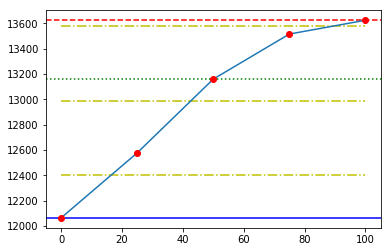

In [69]:
d = data[1][1:] # 1列目はnanなので、それより後だけを使う
import matplotlib.pyplot as plt
xmin, xmax = 0, 100
plt.axhline(np.min(d),    ls='-',  c='b')
plt.axhline(np.max(d),    ls='--', c='r')
plt.axhline(np.median(d), ls=':',  c='g')

lines = [np.mean(d), np.mean(d)-np.std(d), np.mean(d)+np.std(d)]
plt.hlines(lines, xmin, xmax, linestyles='-.',  colors='y')

x = np.linspace(xmin, xmax, len(d))
plt.plot(x, d)
plt.plot(x, d, 'ro')
plt.show()

* 差分を取って表示する（人口増減）

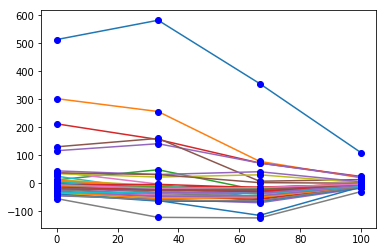

In [66]:
import matplotlib.pyplot as plt
xmin, xmax = 0, 100
for i in range(1, len(data)):
    d = data[i][1:]
    d = np.diff(d)
    x = np.linspace(xmin, xmax, len(d))
    plt.plot(x, d)
    plt.plot(x, d, 'bo')
plt.show()

* 差分を取って表示する（人口増し続けた所だけ）

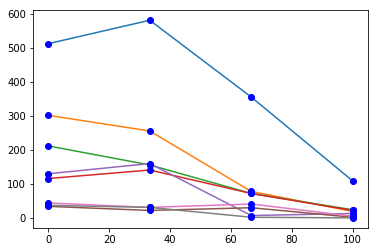

In [67]:
import matplotlib.pyplot as plt
xmin, xmax = 0, 100
for i in range(1, len(data)):
    d = data[i][1:]
    d = np.diff(d)
    if np.min(d) < 0: # 人口減した所は除く
        continue
    x = np.linspace(xmin, xmax, len(d))
    plt.plot(x, d)
    plt.plot(x, d, 'bo')
plt.show()

* 差分を取って表示する（人口減し続けた所だけ）

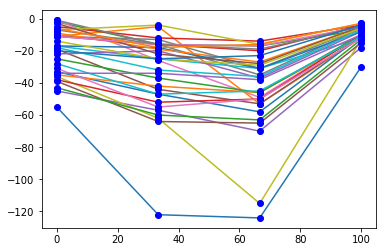

In [68]:
import matplotlib.pyplot as plt
xmin, xmax = 0, 100
for i in range(1, len(data)):
    d = data[i][1:]
    d = np.diff(d)
    if np.max(d) > 0: # 人口増してる所は除く
        continue
    x = np.linspace(xmin, xmax, len(d))
    plt.plot(x, d)
    plt.plot(x, d, 'bo')
plt.show()

* Jupyter (iPython) Notebookを使ってプレゼンテーション資料を作る方法
https://myenigma.hatenablog.com/entry/2016/05/22/160209

* Jupyter Notebook を使ってみよう
https://pythondatascience.plavox.info/python%E3%81%AE%E9%96%8B%E7%99%BA%E7%92%B0%E5%A2%83/jupyter-notebook%E3%82%92%E4%BD%BF%E3%81%A3%E3%81%A6%E3%81%BF%E3%82%88%E3%81%86

* Jupyter事始め
https://qiita.com/taka4sato/items/2c3397ff34c440044978#jupyter%E3%81%AE%E4%BD%BF%E3%81%84%E6%96%B9